#Marlena Giannone Final Project: Predicting Poetry Authors


#Introduction

This [dataset](https://www.kaggle.com/johnhallman/complete-poetryfoundationorg-dataset) contains over 15,000 poems with over 3,000 unique authors. With my minor in creative writing and my focus in that minor on poetry I thought it would be really interesting to try and predict who wrote what.  I first had to condense the set down into only the authors who have at least 10 poems each. It would be too hard to train a classifier otherwise. 

# Loading data

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('kaggle_poem_dataset.csv', index_col=0)

In [3]:
df

,Author,Title,Poetry Foundation ID,Content
0,Wendy Videlock,!,55489,"Dear Writers, I’m compiling the first in what ..."
1,Hailey Leithauser,0,41729,"Philosophic\nin its complex, ovoid emptiness,\..."
2,Jody Gladding,1-800-FEAR,57135,We'd like to talk with you about fear t...
3,Joseph Brodsky,1 January 1965,56736,The Wise Men will unlearn your name.\nAbove yo...
4,Ted Berrigan,3 Pages,51624,For Jack Collom\n10 Things I do Every Day\n\np...
...,...,...,...,...
15647,Hannah Gamble,Your Invitation to a Modest Breakfast,56059,"It’s too cold to smoke outside, but if you com..."
15648,Eleni Sikelianos,Your Kingdom\n \n \n \n Launch Audio in a N...,145220,if you like let the body feel\nall its own evo...
15649,Susan Elizabeth Howe,“Your Luck Is About To Change”,41696,(A fortune cookie)\nOminous inscrutable Chines...
15650,Andrew Shields,Your Mileage May Vary,90177,1\nOur last night in the house was not our las...


I'm using a for loop to find the authors with more than 10 poems.

I am isolating the Author column, aggfunc = size means it's counting the size of each author (so how many times it's repeated). I found information on how to do this [here](https://datatofish.com/count-duplicates-pandas/).

In [4]:
dup_author = df.pivot_table(index=['Author'], aggfunc='size')
new_set = pd.DataFrame()
i = 0
for key in dup_author.keys():
    if dup_author[key] > 9:
        new_set = new_set.append(df.loc[df['Author'] == key], ignore_index = True)
        i+=1
        '''below I talk about wanting to see the most frequented words for each 
        poet for all their poems combined. These are the authors I will use to display that'''
        if dup_author[key] > 70:
            print(key)


Alfred, Lord Tennyson
Anonymous
William Shakespeare


Printing dup_author to show how it has collected the frequencies of each author.

In [5]:
dup_author

Author
'Annah Sobelman          2
A. B. Spellman           1
A. E. Housman           16
A. E. Stallings         29
A. F. Moritz            19
                        ..
mIEKAL aND               1
sam sax                  9
torrin a. greathouse     1
Álvaro de Campos         2
Æmilia Lanyer            1
Length: 3310, dtype: int64

In [6]:
new_set

,Author,Title,Poetry Foundation ID,Content
0,A. E. Housman,Epitaph on an Army of Mercenaries,57275,"These, in the days when heaven was falling,\nT..."
1,A. E. Housman,Is My Team Ploughing,51782,"“Is my team ploughing,\nThat I was used to dri..."
2,A. E. Housman,A Shropshire Lad 1: From Clee to heaven the b...,44410,"From Clee to heaven the beacon burns,\nThe shi..."
3,A. E. Housman,A Shropshire Lad 12: When I watch the living meet,44416,"When I watch the living meet,\nAnd the moving ..."
4,A. E. Housman,A Shropshire Lad 19: The time you won your tow...,44415,The time you won your town the race\nWe chaire...
...,...,...,...,...
7756,Yvor Winters,Sir Gawaine and the Green Knight\n \n \n \n ...,47722,"Reptilian green the wrinkled throat,\nGreen as..."
7757,Yvor Winters,The Slow Pacific Swell,47777,"Far out of sight forever stands the sea,\nBoun..."
7758,Yvor Winters,Time and the Garden\n \n \n \n Launch Audio...,47784,The spring has darkened with activity.\nThe fu...
7759,Yvor Winters,To a Young Writer,47780,"Achilles Holt, Stanford, 1930\nHere for a few ..."


As you can see the data is put in alphabetical order so here I'm shuffling the data to make it useable. I got this info from the [pandas doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [7]:
new_set = new_set.sample(frac =1)
new_set = new_set.reset_index()
new_set

,index,Author,Title,Poetry Foundation ID,Content
0,144,Aimee Nezhukumatathil,What I Learned From the Incredible Hulk\n \n \...,56132,"When it comes to clothes, make\nan allowance f..."
1,3247,Howard Nemerov,The Brief Journey West,42701,"By the dry road the fathers cough and spit,\nT..."
2,6250,Rudyard Kipling,The Secret of the Machines,46786,(MODERN MACHINERY)\nWe were taken from the ore...
3,3255,Howard Nemerov,Learning the Trees,33182,"Before you can learn the trees, you have to le..."
4,1463,Claudia Emerson,Ground Truth,58431,"My brother's funeral over, the dark-clothed\nc..."
...,...,...,...,...,...
7756,6210,Rosmarie Waldrop,Conversation 4: On Place\n \n \n \n Launch ...,53465,"I sit in my own shadow, she says, the way my m..."
7757,169,Alan R. Shapiro,Manufacturing,42693,"Up in the billboard, over old South Station,\n..."
7758,4407,Linda Bierds,The Neon Artist in December,46699,"Snow everywhere, like the salt\nelectrons jump..."
7759,5044,Matthew Rohrer,Poem Written with Bashō [“A photograph”],57534,A photograph\non the back of a hand mirror\nre...


In [8]:
new_set.loc[0]

index                                                                 144
Author                                              Aimee Nezhukumatathil
Title                   What I Learned From the Incredible Hulk\n \n \...
Poetry Foundation ID                                                56132
Content                 When it comes to clothes, make\nan allowance f...
Name: 0, dtype: object

Here's a plot of how many poems per author. It's a bit hard to look at since there are so many.


<AxesSubplot:>

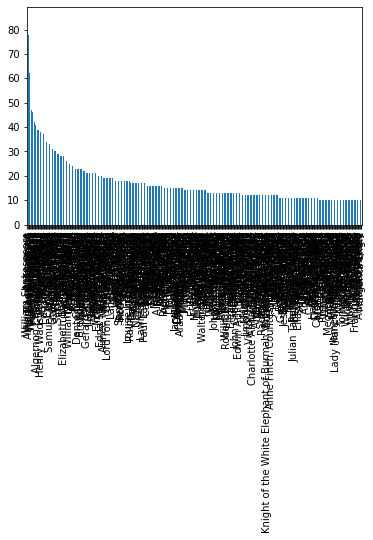

In [9]:
new_set['Author'].value_counts().plot.bar()

So the authors vary from having a max of nearly 80 poems and an average of 10.

A lot of the code and ideas I took from this [article](https://towardsdatascience.com/a-machine-learning-approach-to-author-identification-of-horror-novels-from-text-snippets-3f1ef5dba634) on prediciting which horror author's writing sytle was more unique, which is, in a sense, what I'm doing here. I imagine if I kept all the code the same (which I will do for one experiment) the method might only be accurate in predicting that one author with almost 80 poems- not even because it is unique, but because there is much more data to look at. 

# Changing into X and y for training and testing

After condensing the data I'm left with 7761 poems with 451 different authors. I'm not sure if this is going to be enough data but we shall find out.

Setting the labels and features.

In [10]:
y = new_set['Author']
print(y)

0       Aimee Nezhukumatathil
1              Howard Nemerov
2             Rudyard Kipling
3              Howard Nemerov
4             Claudia Emerson
                ...          
7756         Rosmarie Waldrop
7757          Alan R. Shapiro
7758             Linda Bierds
7759           Matthew Rohrer
7760          Michael Robbins
Name: Author, Length: 7761, dtype: object


In [11]:
X = new_set['Content']

In [12]:
X

0       When it comes to clothes, make\nan allowance f...
1       By the dry road the fathers cough and spit,\nT...
2       (MODERN MACHINERY)\nWe were taken from the ore...
3       Before you can learn the trees, you have to le...
4       My brother's funeral over, the dark-clothed\nc...
                              ...                        
7756    I sit in my own shadow, she says, the way my m...
7757    Up in the billboard, over old South Station,\n...
7758    Snow everywhere, like the salt\nelectrons jump...
7759    A photograph\non the back of a hand mirror\nre...
7760    By the sparklet of certain ciliates cesium\npr...
Name: Content, Length: 7761, dtype: object

# Word Clouds (A display of the most frequented words per poem)

The same [article](https://towardsdatascience.com/a-machine-learning-approach-to-author-identification-of-horror-novels-from-text-snippets-3f1ef5dba634) shows how to display the frequency of words in a poem in a word cloud. I thought this was a very cool and helpful visual. If my dataset had fewer authors and more of each of their poems I'd try and create a cloud for each and see how their most useds words differ. [Here](https://www.datacamp.com/community/tutorials/wordcloud-python) is another article I used to learn more about word clouds.

In [13]:
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [14]:
#?WordCloud

When it comes to clothes, make
an allowance for the unexpected.
Be sure the spare in the trunk
of your station wagon with wood paneling

isn’t in need of repair. A simple jean jacket
says Hey, if you aren’t trying to smuggle
rare Incan coins through this peaceful
little town and kidnap the local orphan,

I can be one heck of a mellow kinda guy.
But no matter how angry a man gets, a smile
and a soft stroke on his bicep can work
wonders. I learned that male chests

also have nipples, warm and established—
green doesn’t always mean envy.
It’s the meadows full of clover
and chicory the Hulk seeks for rest, a return

to normal. And sometimes, a woman
gets to go with him, her tiny hands
correcting his rumpled hair, the cuts
in his hand. Green is the space between

water and sun, cover for a quiet man,
each rib shuttling drops of liquid light.
Aimee Nezhukumatathil


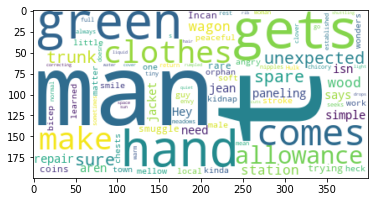

By the dry road the fathers cough and spit,
This is their room. They are the ones who hung
That bloody sun upon the southern wall
And crushed the armored beetle to the floor.

The father’s skin is seamed and dry, the map
Of that wild region where they drained the swamp
And set provision out that they might sit,
Of history the cracked precipitate,

Until the glass be shattered and the sun
Descend to burn the prosperous flesh away
Of the filthy world, so vilely fathered on
The fathers, such black cinders, sitting there.

Old pioneers, what lecheries remain?
When schoolgirls pass, what whispers of their skirts,
Cold gleams of flesh, solicit in your veined
And gemlike eyes the custom of desire?

None now. Their eyes are sunk in ancient flesh,
And the sarcastic triumph of the mind
They now enjoy, letting their lust alone
Who may have kin but have no longer kind.

Neither tomorrow’s monstrous tumor nor
The reformation of the past they wish,
Who hold in silent colloquy the world
A shrivelled 

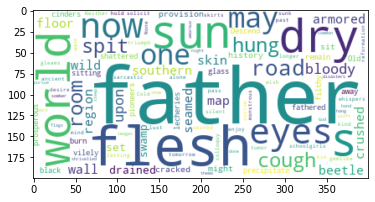

(MODERN MACHINERY)
We were taken from the ore-bed and the mine,
We were melted in the furnace and the pit—
We were cast and wrought and hammered to design,
We were cut and filed and tooled and gauged to fit.
Some water, coal, and oil is all we ask,
And a thousandth of an inch to give us play:
And now, if you will set us to our task,
We will serve you four and twenty hours a day!

We can pull and haul and push and lift and drive,
We can print and plough and weave and heat and light,
We can run and race and swim and fly and dive,
We can see and hear and count and read and write!

Would you call a friend from half across the world?
If you’ll let us have his name and town and state,
You shall see and hear your crackling question hurled
Across the arch of heaven while you wait.
Has he answered? Does he need you at his side?
You can start this very evening if you choose,
And take the Western Ocean in the stride
Of seventy thousand horses and some screws!

The boat-express is waiting your com

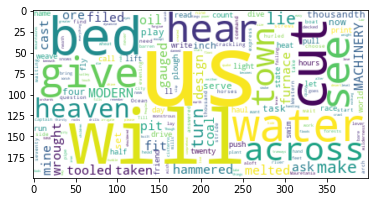

In [15]:
for i in range(3):
    wordcloud_i = WordCloud(background_color='white').generate(X[i])
    print(X[i])
    print(new_set['Author'][i])
    plt.imshow(wordcloud_i, interpolation='bilinear')
    plt.show()

The top poets with the most poems are:

Alfred, Lord Tennyson;
Emily Dickinson;
William Shakespeare
(I removed Anonymous because I figure that is not one collective person but rather a series of poets who didn't want to be named, hence finding a pattern in them would be extremely difficult).

Here are the word clouds for all of the words in all of their poems

In [16]:
contents = ""
for i in range(len(y)):
    if y[i] == "Alfred, Lord Tennyson":
        contents += X[i]

Checking to see this did what I wanted it to (concatenated all the words from each poem).

In [26]:
print(contents[0:858])

It is the miller’s daughter,
And she is grown so dear, so dear,
That I would be the jewel
That trembles at her ear:
For hid in ringlets day and night,
I’d touch her neck so warm and white.

And I would be the girdle
About her dainty, dainty waist,
And her heart would beat against me,
In sorrow and in rest:
And I should know if it beat right,
I’d clasp it round so close and tight.

And I would be the necklace,
And all day long to fall and rise
Upon her balmy bosom,
With her laughter or her sighs:
And I would lie so light, so light,
I scarce should be unclasped at night.To-night the winds begin to rise
And roar from yonder dropping day:
The last red leaf is whirl'd away,
The rooks are blown about the skies;

The forest crack'd, the waters curl'd,
The cattle huddled on the lea;
And wildly dash'd on tower and tree
The sunbeam strikes along the world:


Author: Alfred, Lord Tennyson


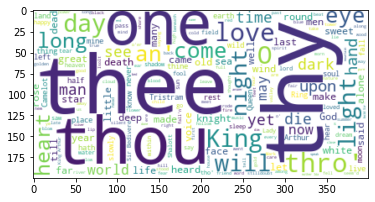

In [27]:
#wordcloud_i = WordCloud().generate(contents)
wordcloud_i = WordCloud(background_color='white').generate(contents)
print('Author: Alfred, Lord Tennyson')
plt.imshow(wordcloud_i, interpolation='bilinear')
plt.show()

Author: Emily Dickinson


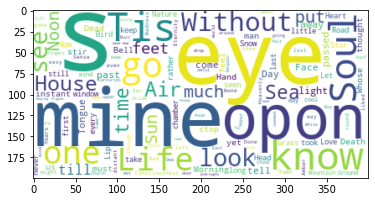

In [28]:
contents = ""
for i in range(len(y)):
    if y[i] == "Emily Dickinson":
        contents += X[i]
#wordcloud_i = WordCloud().generate(contents)
wordcloud_i = WordCloud(background_color='white').generate(contents)
print('Author: Emily Dickinson')
plt.imshow(wordcloud_i, interpolation='bilinear')
plt.show()

Author: William Shakespeare


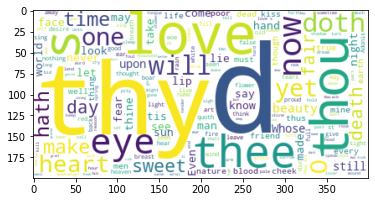

In [29]:
contents = ""
for i in range(len(y)):
    if y[i] == "William Shakespeare":
        contents += X[i]
wordcloud_i = WordCloud(background_color='white').generate(contents)
print('Author: William Shakespeare')
plt.imshow(wordcloud_i, interpolation='bilinear')
plt.show()

Based on these word clouds I will run a test of stopwords with the words that are "the" and equivalent because they are obviously taking up quite a bit of space for some authors.

# Training and Testing (Bag of Words and Naive Bayes)

Here I am changing the authors into numbered labels so I can work with them easier. I learned about the label encoder from the [scikit learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). 

In [30]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
y

array([  8, 189, 373, ..., 258, 301, 312])

Here I will attempt to classify the data without removing any stopwords or punctuation. This will be interesting and I expect won't work well, but I want to keep the structure of the poems.

The Bag of Words classifier does exactly as it's described. It takes all the words and separates them and throws them in a "bag." The scikit learn CountVectorizer is used in this case which I learned more about [here](https://scikit-learn.org/stable/modules/feature_extraction.html#stop-words), but took and modified the code if necessary from [here](https://towardsdatascience.com/a-machine-learning-approach-to-author-identification-of-horror-novels-from-text-snippets-3f1ef5dba634).

However, what's hard with poetry vs say a movie script or a book is that every word counts, every word means something. Even punctuation means something. Another thing I realize thought is leaving stopwords in makes it harder to predict since most poets probably will have those stop words in their poems even if they are there for a reason. Accuracy would then be lower.



In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y
                                  ,test_size=0.2, random_state = 50)


bow_transformer=CountVectorizer().fit(X_train)
text_bow_train=bow_transformer.transform(X_train)
text_bow_test=bow_transformer.transform(X_test)


For this project I had to learn a new classification algorithm because my dataset was large with features not as simple as a number. We experimented with that a little in our final assignment but to be honest I was quite confused with how it worked. This classification technique is based on Bayes’ Theorem “with an assumption of independence among predictors (Ray).” “In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature” (Ray). Some of the pros of this method include needing less training data, performing better than logistic regression, and performs well on categorical variables.

It’s often used in Sentiment Analysis- so if I were to detect the tone of the poems and labeled them happy or sad or something like that.

Here is a quick explanation of Bayes' Theorem that I read to understand what was going on better:

Marginal probability is “the probability of an event irrespective of the outcomes of the other random variables”(Brownlee). Joint probability is the probability of two or more simultaneous events occurring. Conditional probability is the probability of one variable given the occurrence of another. Joint probability can be calculated with conditional probability P(A,B) = P(A|B)*P(B)- it is symmetrical and the conditional can be calculated with the inverse- it is not symmetrical. Conditional probability can also be calculated with the other conditional probability, P(A|B) + P(B|A) * P(A)/P(B). This is Bayes’ Theorem. 

In [32]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model = model.fit(text_bow_train, y_train)

In [33]:
model.score(text_bow_train, y_train)

0.045103092783505154

In [34]:
model.score(text_bow_test, y_test)

0.013522215067611075

Clearly the accuracy is basically nonexistent. 

Here I found some code to remove stop words ([link](https://towardsdatascience.com/a-machine-learning-approach-to-author-identification-of-horror-novels-from-text-snippets-3f1ef5dba634)) and [here](https://machinelearningmastery.com/clean-text-machine-learning-python/). This can be done in many ways and I will experiment with that further on.

In [35]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/marlenag/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marlenag/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


I chose to just remove those words and see if the accuracy improved even a little.

In [36]:
stopword = ['the','thee','thou']

This method was taken from the article and modified slightly to fit my needs. It's a common way to preprocess text before using it and I found many similar examples on other sites as well.

Lemmatization takes words and reduces them to their roots/ base of the word while stemming just removes the ending. In this case lemmatization is better since we're already losing a lot of the poem by removing punctuation and eventually reducing it to a bag of words.

In [37]:
lemmatiser = WordNetLemmatizer()# Defining a module for Text Processing
def text_process(tex):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
    # 3. Removal of Stopwords
    return [word for word in a.split() if word.lower() not 
            in stopword]

I also attempted to create my own method to clean the poems, but using the lemmatizer got a little bit confusing so I ended up sticking with the example.

In [38]:
# # print(X[3].translate(str.maketrans('', '', string.punctuation)))
# # print('NORMAL')
# # print(X[3])
# no_punct = []
# for i in range(len(X)):
#     #X[i] = X[i].translate(str.maketrans('', '', string.punctuation))
#     no_punct.append(X[i].translate(str.maketrans('', '', string.punctuation)))
# print(pd.DataFrame(no_punct))
# ex = pd.DataFrame(no_punct)
# # print(X)

In [39]:
# ex[0].str.split()

In [40]:
#lemmatiser.lemmatize(ex.loc[0].str.split())

In [41]:
def process_txt(txt):
    #remove punctuation
    no_punct = []
    for i in range(len(txt)):
        no_punct.append((txt[i].translate(str.maketrans('', '', string.punctuation))))
    no_punct = pd.DataFrame(no_punct)
    for i in range(len(no_punct)):
        no_punct[i].str.split()
    #txt = pd.DataFrame(no_punct)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state = 50)
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_train)

text_bow_train=bow_transformer.transform(X_train)
text_bow_test=bow_transformer.transform(X_test)

In [ ]:
model = MultinomialNB()
model = model.fit(text_bow_train, y_train)

In [ ]:
model.score(text_bow_train, y_train)

In [ ]:
model.score(text_bow_test, y_test)

This clearly did not work well at all either.

With removal of the english stopwords. This code is the same as the code from the article. I tried to create my own method similar to this one, but I couldn't get it to run properly within the count vectorizer.

In [ ]:
def text_process2(tex):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
    # 3. Removal of Stopwords
    return [word for word in a.split() if word.lower() not 
            in stopwords.words('english')]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 50)
bow_transformer=CountVectorizer(analyzer=text_process2).fit(X_train)
text_bow_train=bow_transformer.transform(X_train)
text_bow_test=bow_transformer.transform(X_test)



model = MultinomialNB()
model = model.fit(text_bow_train, y_train)

In [ ]:
model.score(text_bow_train, y_train)

In [ ]:
model.score(text_bow_test, y_test)

None of these methods are working very well at all. However, I was shocked to see there was even 25% accuracy. That is a big jump from when I initially started testing and honestly isn't terrible considering bag of words strips the order and structure of the words in the poems. In the article they used a confusion matrix to display the accuracies of each individual author but that matrix would be much to large... Below I will use the top five most frequented authors and repeat the process seeing if the accuracies improve. I am removing "Anonymous" because I assume the poems from that author is not one person.

# Testing with the top 5 poets

In [ ]:
df = pd.read_csv('kaggle_poem_dataset.csv', index_col=0)

In [ ]:
dup_author = df.pivot_table(index=['Author'], aggfunc='size')
new_set = pd.DataFrame()
i = 0
labels = []
for key in dup_author.keys():

    if dup_author[key] > 50 and key != "Anonymous":
        new_set = new_set.append(df.loc[df['Author'] == key], ignore_index = True)
        i+=1
        '''below I talk about wanting to see the most frequented words for each 
        poet for all their poems combined. These are the authors I will use to display that'''
        if dup_author[key] > 50:
            print(key)
            labels.append(key)
print(labels)

In [ ]:
new_set = new_set.sample(frac =1)
new_set = new_set.reset_index()

In [ ]:
new_set['Author'].value_counts().plot.bar()

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = new_set['Author']
print(y)

In [ ]:
X = new_set['Content']
X

In [ ]:
for i in range(5):
    #wordcloud_i = WordCloud().generate(X[i])
    wordcloud_i = WordCloud(background_color='white').generate(X[i])
    #print(X[i])
    print(new_set['Author'][i])
    plt.imshow(wordcloud_i, interpolation='bilinear')
    plt.show()

The word clouds in these are already looking promising as they are pretty varied without removing stop words.

In [86]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
y

array([1, 4, 4, 1, 1, 3, 2, 0, 4, 0, 1, 3, 1, 4, 1, 3, 3, 3, 1, 2, 4, 3,
       3, 0, 1, 2, 3, 0, 2, 3, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2, 0, 2,
       3, 3, 0, 2, 2, 1, 4, 1, 1, 3, 2, 2, 1, 2, 4, 3, 2, 0, 1, 4, 2, 3,
       2, 0, 4, 0, 3, 1, 3, 0, 3, 3, 0, 1, 3, 1, 0, 3, 3, 2, 1, 1, 0, 3,
       2, 4, 1, 1, 3, 2, 3, 4, 4, 0, 0, 1, 2, 1, 4, 1, 0, 2, 0, 1, 3, 2,
       1, 4, 4, 4, 4, 0, 0, 0, 3, 0, 3, 1, 0, 3, 0, 3, 3, 2, 3, 0, 2, 0,
       1, 4, 4, 4, 1, 0, 2, 2, 4, 0, 4, 4, 2, 4, 1, 1, 2, 0, 2, 3, 0, 2,
       3, 2, 0, 0, 2, 0, 0, 1, 4, 3, 1, 4, 0, 0, 2, 4, 2, 0, 3, 3, 0, 0,
       2, 3, 1, 3, 4, 4, 0, 3, 4, 4, 3, 3, 0, 3, 0, 2, 0, 3, 3, 3, 3, 0,
       1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 4, 4, 2, 1, 3, 0, 3, 2, 0,
       4, 1, 4, 3, 2, 3, 4, 0, 1, 4, 4, 3, 3, 3, 1, 0, 2, 3, 4, 1, 4, 0,
       3, 3, 0, 0, 3, 2, 1, 3, 4, 3, 2, 3, 4, 2, 0, 0, 3, 3, 3, 3, 3, 4,
       4, 3, 3, 0, 1, 2, 4, 4, 0, 2, 1, 0, 4, 2, 3, 4, 0, 4, 2, 2, 0, 1,
       2, 1, 0, 3, 0, 3, 3, 2, 2, 0, 2, 1, 1, 3, 4,

This is removal of just the "the" words.

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y
                                  ,test_size=0.2 random_state = 50)
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_train)
text_bow_train=bow_transformer.transform(X_train)
text_bow_test=bow_transformer.transform(X_test)


model = MultinomialNB()
model = model.fit(text_bow_train, y_train)

In [88]:
model.score(text_bow_train, y_train)

0.9595588235294118

In [89]:
model.score(text_bow_test, y_test)

0.7391304347826086

I only removed the "the" words for this test and the accuracy changed that drastically. Although I'm not trying to prove that every word matters in poetry this helps prove that point considering I only took out a word that probably has the least meaning in a poem. 

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y
                                  ,test_size=0.2,random_state = 50)
bow_transformer=CountVectorizer(analyzer=text_process2).fit(X_train)
text_bow_train=bow_transformer.transform(X_train)
text_bow_test=bow_transformer.transform(X_test)


model = MultinomialNB()
model = model.fit(text_bow_train, y_train)

In [91]:
model.score(text_bow_train, y_train)

0.9963235294117647

In [92]:
model.score(text_bow_test, y_test)

0.8260869565217391

In [93]:
y_pred = model.predict(text_bow_test)

This is what I was looking for! This is 
the accuracy on the model that removes the English stopwords. It's only 10% more accurate than just remvoing "the" words which is quite interesting. Oh, maybe I can do a test of the most frequented words in the dataset between all the poets and remove them to see what happens.

What's interesting to me is that list of stopwords is very long and, as I already mentioned, probably rips away any of the meaning of the poems themeselves. However my goal wasn't sentiment analysis or anything of the like, so this method words well enough. I know there are many other ways this can be done and I didn't have time to experiment with them all. However, given what we've learned in class and how well I was able to understand what was going on I think this was an overall successful experiment. 

Here I will combine all the words and do a word cloud to find the most frequented.

In [97]:
X[0]

'A Bird, came down the Walk -\nHe did not know I saw -\nHe bit an Angle Worm in halves\nAnd ate the fellow, raw,\n\nAnd then, he drank a Dew\nFrom a convenient Grass -\nAnd then hopped sidewise to the Wall\nTo let a Beetle pass -\n\nHe glanced with rapid eyes,\nThat hurried all abroad -\nThey looked like frightened Beads, I thought,\nHe stirred his Velvet Head. -\n\nLike one in danger, Cautious,\nI offered him a Crumb,\nAnd he unrolled his feathers,\nAnd rowed him softer Home -\n\nThan Oars divide the Ocean,\nToo silver for a seam,\nOr Butterflies, off Banks of Noon,\nLeap, plashless as they swim.'

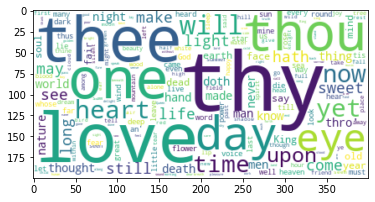

In [101]:
contents = ""
for i in range(len(X)):
    contents = contents +X[i]
#wordcloud_i = WordCloud().generate(contents)
wordcloud_i = WordCloud(background_color='white').generate(contents)
plt.imshow(wordcloud_i, interpolation='bilinear')
plt.show()
#contents

In [14]:
stopword2 = ['thee', 'thou', 'thy', 'will']

I just repasted the text_process method and changed to stopword list to this new one.

In [106]:
def text_process3(tex):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
    # 3. Removal of Stopwords
    return [word for word in a.split() if word.lower() not 
            in stopword2]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y
                                  ,test_size=0.2,random_state = 50)
bow_transformer=CountVectorizer(analyzer=text_process3).fit(X_train)
text_bow_train=bow_transformer.transform(X_train)
text_bow_test=bow_transformer.transform(X_test)


model = MultinomialNB()
model = model.fit(text_bow_train, y_train)

In [108]:
model.score(text_bow_train, y_train)

0.9595588235294118

In [109]:
model.score(text_bow_test, y_test)

0.7536231884057971

This did help with the accuracy from just the "the" words, but didn't surpass the English stopwords.

This is the confusion matrix for the highest accuracy test.

In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[20,  1,  2,  0,  0],
       [ 0,  8,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 1,  1,  1, 13,  2],
       [ 1,  1,  2,  0, 10]])

In [112]:
print(labels)

['Alfred, Lord Tennyson', 'Emily Dickinson', 'Rae Armantrout', 'William Shakespeare', 'William Wordsworth']


It looks like Alfred Lord Tennyson, and William Shakespeare had the highest accuracy based on the confusion matrix. Their words choice is probably a bit more unqiue than the other poets.

#A different Transformer

In the same documentation for CountVectorizer lied the tfidf transformer and vectorizer. I decided to also mess with these since the documentation explains the vectorizer uses tfidf transformer and count vectorizer in a single model.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state = 50)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stopword)
transformer = vectorizer.fit(X_train)

text_train=transformer.transform(X_train)
text_test=transformer.transform(X_test)

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model = model.fit(text_train, y_train)

In [29]:
model.score(text_train, y_train)

0.7867647058823529

In [30]:
model.score(text_test, y_test)

0.34782608695652173

This was with the "the" stopwords. it didn't work super well.

In [31]:
vectorizer = TfidfVectorizer(stop_words=stopword2)
transformer = vectorizer.fit(X_train)

text_train=transformer.transform(X_train)
text_test=transformer.transform(X_test)

model = MultinomialNB()
model = model.fit(text_train, y_train)

In [32]:
model.score(text_train, y_train)

0.7316176470588235

In [33]:
model.score(text_test, y_test)

0.34782608695652173

In [35]:
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
transformer = vectorizer.fit(X_train)

text_train=transformer.transform(X_train)
text_test=transformer.transform(X_test)

model = MultinomialNB()
model = model.fit(text_train, y_train)

In [36]:
model.score(text_train, y_train)

0.9816176470588235

In [37]:
model.score(text_test, y_test)

0.42028985507246375

Better but still not as good as with the preprocessing code defined above.

In [ ]:
vectorizer = TfidfVectorizer(use_idf=True)
transformer = vectorizer.fit_transform(X)

In [ ]:
for i in range(5):
    first_vector = transformer[i]
    tfidf = pd.DataFrame(first_vector.T.todense(), index=vectorizer.get_feature_names(), columns=["tfidf"]) 
    print(tfidf.sort_values(by=["tfidf"],ascending=False))

In [ ]:
print(y[0],y[1],y[2],y[3],y[4])

I found the code on how to do this [here](https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.X83MMF57lQI). This shows the frequency of words in each poem. It words even quicker than the word clouds. I only printed the first 5 for conciseness, but I looked at all of them and it's interesting because most of the poems had stopwords in their top 5, but there were still quite a few poems that didn't. Looking just at the first 5 poems, stopwords aren't super prominent and after looking at the authors, it's the top three highest accuracy, which makes a lot of sense.

#Concluding Thoughts and Future Studies

I found this [thesis](https://ruor.uottawa.ca/bitstream/10393/37309/1/Kesarwani_Vaibhav_2018_thesis.pdf) titled "Automatic Poetry Classification Using Natural Language Processing" which discusses a variety of ways to classify poems using rhyme, diction, and metaphor. I focused on the frequency of the words themselves since there is so much information on classifiers like that. They use a support vector machine and a convolutional neural network. 

Some ideas used include syntactic parsing which is something I was trying to figure out how to do. It "involves the arrangements of sentences in a manner that all the dependenct relations and grammar associations between the words are shown." This includes using dependency trees and part of speech tagging which can then be used in stop word removal. They also use a formula that determines the importance of words instead of just using their frequency like in bag of words.

This piece also discusses what's already been done in this subject. There are actually quite a few more systems for poetry analysis than I would have thought so that's really exciting!

Overall, I learned a lot about text processing and the variety of ways it can be done. I hope to take this knowledge, use it, and expand upon for my honors thesis next semester.

#Bibliography

Brownlee, Jason. “A Gentle Introduction to Bayes Theorem for Machine Learning.” Machine Learning Mastery, 3 Oct. 2019, https://machinelearningmastery.com/bayes-theorem-for-machine-learning/.

Navoneel Chakrabarty. A Machine Learning Approach to Author Identification of Horror Novels from Text Snippets | by Navoneel Chakrabarty | Towards Data Science. https://towardsdatascience.com/a-machine-learning-approach-to-author-identification-of-horror-novels-from-text-snippets-3f1ef5dba634. Accessed 5 Dec. 2020.

Ray, Sunill. “Learn Naive Bayes Algorithm | Naive Bayes Classifier Examples.” Analytics Vidhya, 11 Sept. 2017, https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/.

Vaibhav Kesarwani. Automatic Poetry Classification Using Natural Language Processing. University of Ottawa, 2018, https://ruor.uottawa.ca/bitstream/10393/37309/1/Kesarwani_Vaibhav_2018_thesis.pdf.

